In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
import matplotlib.pyplot as plt

tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")
df_val = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/val.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/test.csv")


In [ ]:
df_train[df_train.duplicated()]


,text,augmented_text
6906,a league live streaming updates,a elgaue ivle streaming updates
9455,abc business news and market analysis,abc buisnses news and maretk analysis
9476,abc business news and market analysis,abc business ensw and market anyalsis
9487,abc business news and market analysis,abc ubisness news and market analysis
9498,abc business news and market analysis,abc busienss wnes and market analysis
...,...,...
742784,wednesday finance with alan kohler,wednesday finnaec with lana kohler
742790,wednesday finance with alan kohler,wednesday finance with lana kohler
742816,wednesday finance with alan kohler,wednesday finance with lana kohler
742873,wednesday markets with fiona clark,wednesday markets iwht fiona lcakr


In [ ]:
df_val[df_val.duplicated()]


,text,augmented_text
42958,abc business news and market analysis,abc ubsiness news and market analysis
150906,abc business news and market analysis,abc usbiness news and mraekt analysis


In [ ]:
df_test[df_test.duplicated()]


,text,augmented_text
52797,abc business news and market analysis,abc business wnes and market aanlyiss
98255,abc business news and market analysis,abc ubsiness news and market analysis


In [ ]:
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>/[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df_train['text'] = df_train['text'].apply(clean_data)
# df_train['augmented_text'] = df_train['augmented_text'].apply(clean_data)
# df_val['text'] = df_val['text'].apply(clean_data)
# df_val['augmented_text'] = df_val['augmented_text'].apply(clean_data)
# df_test['text'] = df_test['text'].apply(clean_data)
# df_test['augmented_text'] = df_test['augmented_text'].apply(clean_data)
# data = pd.concat([df_train,df_val,df_test])


In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv',index=False,)

In [ ]:
#data.csv is being pre-process to save time for training
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv')

In [ ]:
print(data.isnull().sum())
data = data.drop_duplicates(subset=['augmented_text'])
# data = (data[data["augmented_text"] != "name"])
print(data.duplicated().sum())

text              0
augmented_text    0
dtype: int64
0


In [ ]:
max_length = 8

In [ ]:
df = data[data['text'].apply(lambda x: len(x.split(" "))< max_length +1)]

In [ ]:
df.describe()

,text,augmented_text
count,848707,848707
unique,841401,848707
top,abc business news and market analysis,1 billion darling hsarfbour redeevelopment p3...
freq,516,1


In [ ]:
# df = df[:82000]
train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.27, random_state=42)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=24)


In [ ]:
train_x

63521               bali blast survivors gac infection dosk
608666                     seocdn aussie in strife at gaesm
92482     brisbane photographer hcagred whit 79 sex ofef...
298666               hard orwk by enwcastel police apsy off
202405       drone used to redorv intensive fz3m lroductjon
                                ...                        
310255         hogan ateks tax docmunet fight to high cortu
440072    mount laexadner hsier to vote on oposl management
159128           conucli cracks down on yacht cubl drnikign
810630       condamine indeendnt accuses lnp of drt6 tfickw
147551             compo order cotur urlnig unlawful arrest
Name: augmented_text, Length: 619556, dtype: object

In [ ]:
train_y

63521              bali blast survivors face infection risk
608666                     second aussie in strife at games
92482     brisbane photographer charged with 79 sex offe...
298666               hard work by newcastle police pays off
202405       drone used to record intensive farm production
                                ...                        
310255         hogan takes tax document fight to high court
440072    mount alexander shire to vote on pools management
159128           council cracks down on yacht club drinking
810630    condamine independent accuses lnp of dirty tricks
147551             compo order court ruling unlawful arrest
Name: text, Length: 619556, dtype: object

In [ ]:

g_text_tokenizer = Tokenizer()
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [ ]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [ ]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

854284 79749


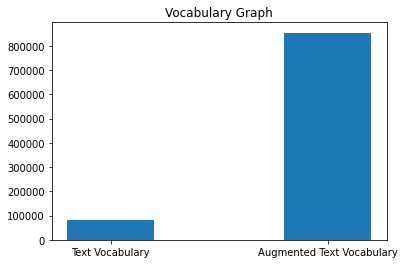

In [ ]:
voc = ["Text Vocabulary", "Augmented Text Vocabulary"]
voc_count = [vocab_size, g_vocab_size]

plt.bar(voc, voc_count, width = 0.4)
plt.title("Vocabulary Graph")
plt.show()

In [ ]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))


In [ ]:
epoch = 20

In [ ]:
#combine the first two methods
from keras.regularizers import l2

model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=128, input_length=max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.RepeatVector(max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
# learning_rate = 0.0001
# optimizer = tf.keras.optimizers.RMSprop(learning_rate)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
model_3.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 8, 128)            10934835  Y          
                                                       2                    
                                                                            
 bidirectional (Bidirectiona  (None, 256)              263168    Y          
 l)                                                                         
                                                                            
 batch_normalization (BatchN  (None, 256)              1024      Y          
 ormalization)                                                              
                                                                            
 repeat_vector (RepeatVector  (None, 8, 256)           0         Y          
 )                                                      

Epoch 1/20
1211/1211 [==============================] - 437s 351ms/step - loss: 6.5698 - accuracy: 0.2415 - val_loss: 6.2986 - val_accuracy: 0.2793
Epoch 2/20
1211/1211 [==============================] - 421s 348ms/step - loss: 4.5897 - accuracy: 0.3947 - val_loss: 6.0334 - val_accuracy: 0.4135
Epoch 3/20
1211/1211 [==============================] - 421s 348ms/step - loss: 2.7367 - accuracy: 0.6269 - val_loss: 5.6639 - val_accuracy: 0.5365
Epoch 4/20
1211/1211 [==============================] - 421s 348ms/step - loss: 1.6167 - accuracy: 0.7799 - val_loss: 6.5751 - val_accuracy: 0.5829
Epoch 5/20
1211/1211 [==============================] - 421s 348ms/step - loss: 1.0355 - accuracy: 0.8619 - val_loss: 6.9846 - val_accuracy: 0.6022
Epoch 6/20
1211/1211 [==============================] - 421s 348ms/step - loss: 0.7253 - accuracy: 0.9057 - val_loss: 7.2411 - val_accuracy: 0.6113
Epoch 7/20
1211/1211 [==============================] - 421s 348ms/step - loss: 0.5406 - accuracy: 0.9304 - val_

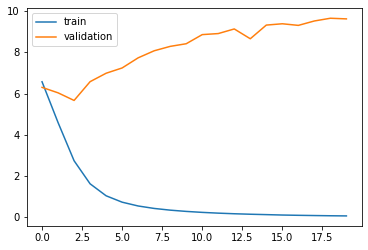

In [ ]:
his_3 = model_3.fit(train_padded, test_padded, batch_size=512, epochs=epoch, validation_data = (val_train_padded, val_test_padded))
plt.plot(his_3.history['loss'])
plt.plot(his_3.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
train_accuracy = his_3.history['accuracy']
val_accuracy = his_3.history['val_accuracy']
print("The training accuracy is ", train_accuracy[-1])
print("The val accuracy is ", val_accuracy[-1])


The training accuracy is  0.9919492602348328
The val accuracy is  0.6263288259506226


In [ ]:
# model.save('/content/drive/MyDrive/Colab_Notebooks/accuracy_84_3lstm_rnn_8inputlength')

In [ ]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')


In [ ]:
test_x.iloc[:10]

240337               fialn decision about pambula mtaerniyt
648707          surpe saturday ybleections chart of the day
82067                bloody brawl results in srroous injugh
622925                      sixers upbeat depstie poor form
104905         businesses fofer uspport to rallying farmers
206660                     eales wouldnt irks hjons signing
612675        esrivce will suffre cbeause of job cuts union
37137                  aaphce to edvleop balnaves oil field
714474                      us rnvog visits kabul for taoms
860700    biketawa plus concept nfexs fautios consideration
Name: augmented_text, dtype: object

In [ ]:
test_y.iloc[:10]

240337               final decision about pambula maternity
648707          super saturday byelections chart of the day
82067                bloody brawl results in serious injury
622925                      sixers upbeat despite poor form
104905         businesses offer support to rallying farmers
206660                     eales wouldnt risk johns signing
612675        service will suffer because of job cuts union
37137                  apache to develop balnaves oil field
714474                      us envoy visits kabul for talks
860700    biketawa plus concept needs cautious considera...
Name: text, dtype: object

In [ ]:
pre = model_3.predict(test_sample)
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ' '.join(index_to_words[prediction] for prediction in pre_index)
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))

In [ ]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})
eva


,input,output,predict
240337,fialn decision about pambula mtaerniyt,final decision about pambula maternity,final decision about pambula maternity
648707,surpe saturday ybleections chart of the day,super saturday byelections chart of the day,super saturday chart of the day
82067,bloody brawl results in srroous injugh,bloody brawl results in serious injury,bloody brawl results in
622925,sixers upbeat depstie poor form,sixers upbeat despite poor form,sixers upbeat despite poor form
104905,businesses fofer uspport to rallying farmers,businesses offer support to rallying farmers,businesses offer support to rallying farmers
206660,eales wouldnt irks hjons signing,eales wouldnt risk johns signing,eales wouldnt risk johns signing
612675,esrivce will suffre cbeause of job cuts union,service will suffer because of job cuts union,service will suffer of job cuts union
37137,aaphce to edvleop balnaves oil field,apache to develop balnaves oil field,to develop listing oil field
714474,us rnvog visits kabul for taoms,us envoy visits kabul for talks,us visits kabul for talks
860700,biketawa plus concept nfexs fautios consideration,biketawa plus concept needs cautious considera...,plus concept consideration


In [ ]:
print("Iutput:    ",test_x.iloc[0])
print("Actual:    ",test_y.iloc[0])
print("Predicted: ",deTokenize(pre[0]))

Iutput:     fialn decision about pambula mtaerniyt
Actual:     final decision about pambula maternity
Predicted:  final decision about pambula maternity   
